In [9]:
import pandas as pd

#a load the data
file=r"C:\Users\坤達\Downloads\College_Data.csv"
df=pd.read_csv(file)
print(df.head())

                     Unnamed: 0 Private  Apps  Accept  Enroll  Top10perc  \
0  Abilene Christian University     Yes  1660    1232     721         23   
1            Adelphi University     Yes  2186    1924     512         16   
2                Adrian College     Yes  1428    1097     336         22   
3           Agnes Scott College     Yes   417     349     137         60   
4     Alaska Pacific University     Yes   193     146      55         16   

   Top25perc  F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  \
0         52         2885          537      7440        3300    450      2200   
1         29         2683         1227     12280        6450    750      1500   
2         50         1036           99     11250        3750    400      1165   
3         89          510           63     12960        5450    450       875   
4         44          249          869      7560        4120    800      1500   

   PhD  Terminal  S.F.Ratio  perc.alumni  Expend  Grad.R

In [7]:
print(df.columns)

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')


Representation:
1 CRIM: per capita crime rate by town
2 ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
3 INDUS: proportion of non-retail business acres per town
4 CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
5 NOX: nitric oxides concentration (parts per 10 million) [parts/10M]
6 RM: average number of rooms per dwelling
7 AGE: proportion of owner-occupied units built prior to 1940
8 DIS: weighted distances to five Boston employment centres
9 RAD: index of accessibility to radial highways
10 TAX: full-value property-tax rate per $10,000 [$/10k]
11 PTRATIO: pupil-teacher ratio by town
12 LSTAT: % lower status of the population
13 MEDV: Median value of owner-occupied homes in $1000's [k$]

In [3]:
#b How many rows and columns
import numpy as np
data=np.shape(df)
print(data)

(506, 14)


Ther are 506 rows and 14 columns
Each row represents the observation of suburb
Each column represents the the number of variable

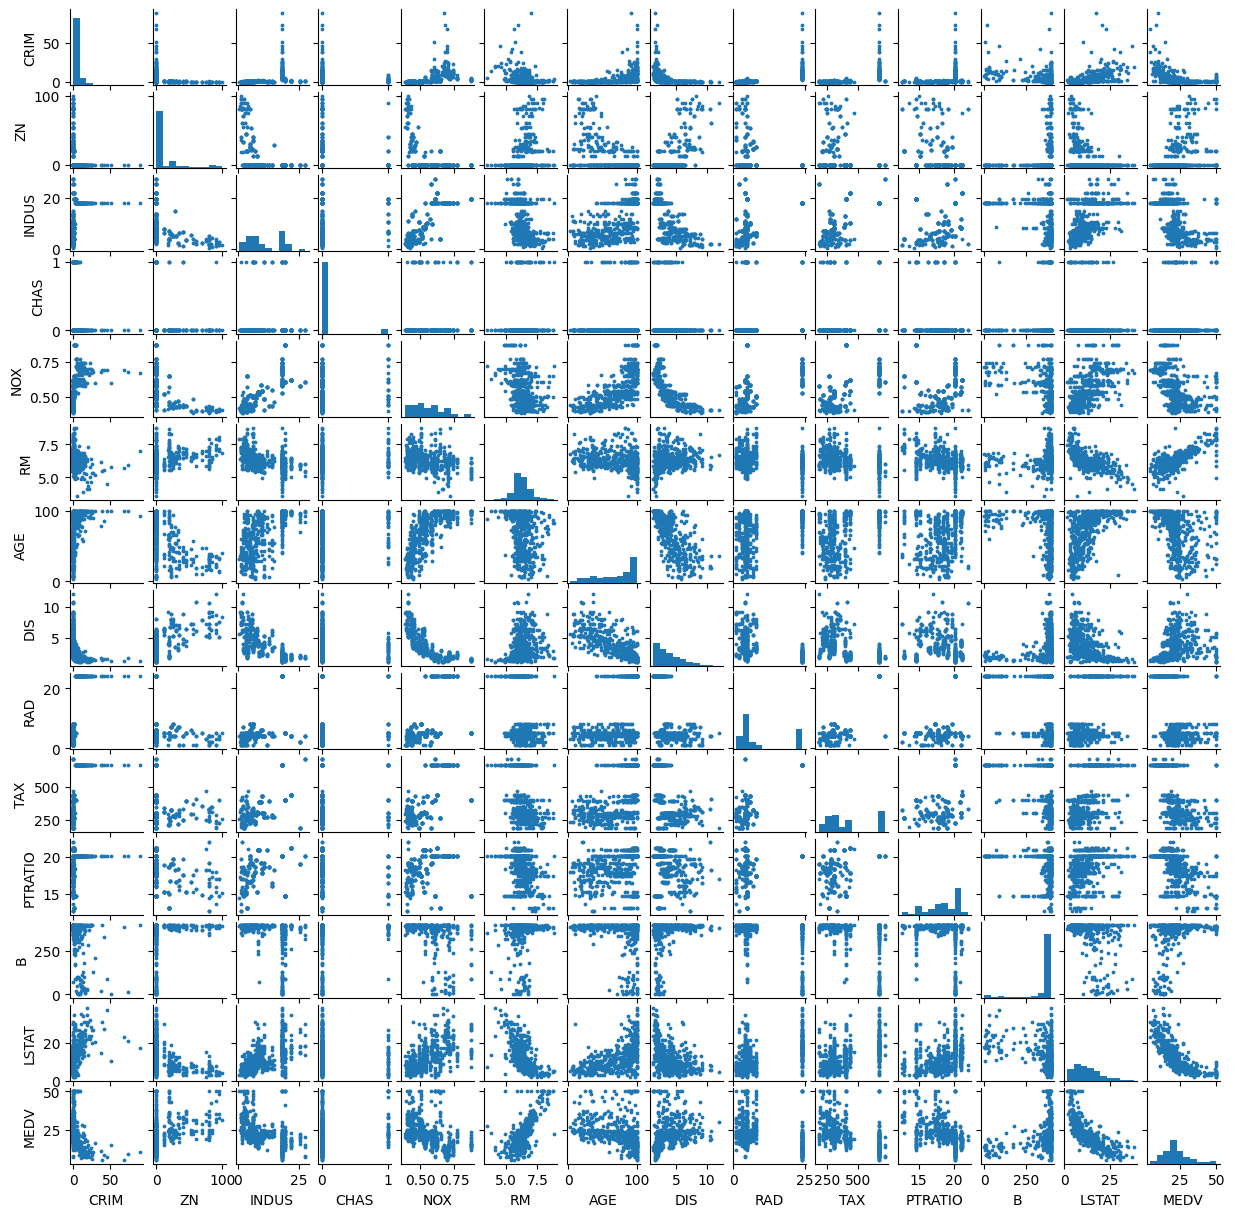

In [4]:
#c Make pairwise scatterplots
import matplotlib.pyplot as plt
import seaborn as sns

g=sns.PairGrid(df)
g.map_upper(plt.scatter,s=3)
g.map_diag(plt.hist)
g.map_lower(plt.scatter,s=3)
g.figure.set_size_inches(12,12)

plt.show()

1.LSTAT and medv
Have negative relationship,means that the population of lower status has more than median.
2.RM and medv
Have positive relationship,means that home with more rooms has exceeds tha value of median.
3.LSTAT and RM
Have negative relationship,means that lower status people has fewer home with more rooms.

In [8]:
#d Are there any predictors associated with crim
print(df.corrwith(df['CRIM']).sort_values())

MEDV      -0.388305
B         -0.385064
DIS       -0.379670
RM        -0.219247
ZN        -0.200469
CHAS      -0.055892
PTRATIO    0.289946
AGE        0.352734
INDUS      0.406583
NOX        0.420972
LSTAT      0.455621
TAX        0.582764
RAD        0.625505
CRIM       1.000000
dtype: float64


We can see that "RAD,TAX" are have high positive relationship to "CRIM".The other,eg."LSTAT,NOX,INDUS,AGE,PTRATIO",have same situation.

In [9]:
#e Do any suburbs appear to have particularly high CRIM?TAX?PTRATIO? Also comment the range
print(df[['CRIM','TAX','PTRATIO']].describe())

high_cr=df[df['CRIM']>df['CRIM'].mean()]
high_tax=df[df['TAX']>df['TAX'].mean()]
high_ratio=df[df['PTRATIO']>dfn['PTRATIO'].mean()]

print("高犯罪區域數量:",len(high_cr))
print("高稅率區域數量:",len(high_tax))
print("高師生比區域數量:",len(high_ratio))


             CRIM         TAX     PTRATIO
count  506.000000  506.000000  506.000000
mean     3.613524  408.237154   18.455534
std      8.601545  168.537116    2.164946
min      0.006320  187.000000   12.600000
25%      0.082045  279.000000   17.400000
50%      0.256510  330.000000   19.050000
75%      3.677083  666.000000   20.200000
max     88.976200  711.000000   22.000000
高犯罪區域數量: 128
高稅率區域數量: 168
高師生比區域數量: 292


In [10]:
#f How many suburbs bound the river?
print(df['CHAS'].value_counts()[1])

35


In [23]:
#g What's the median of PTRATIO?
import pandas as pd


file_path=r"C:\Users\坤達\Downloads\boston.csv"
df=pd.read_csv(file_path)

#f
print(df['PTRATIO'].median())

19.05


(h)不會寫

In [25]:
#i More than 7
print(len(df[df['RM']>7]))

64


In [26]:
#More than 8
print(len(df[df['RM']>8]))

13


In [28]:
df[df['RM']>8]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
97,0.12083,0.0,2.89,0,0.4450,8.069,76.0,3.4952,2,276,18.0,396.90,4.21,38.7
163,1.51902,0.0,19.58,1,0.6050,8.375,93.9,2.1620,5,403,14.7,388.45,3.32,50.0
204,0.02009,95.0,2.68,0,0.4161,8.034,31.9,5.1180,4,224,14.7,390.55,2.88,50.0
224,0.31533,0.0,6.20,0,0.5040,8.266,78.3,2.8944,8,307,17.4,385.05,4.14,44.8
225,0.52693,0.0,6.20,0,0.5040,8.725,83.0,2.8944,8,307,17.4,382.00,4.63,50.0
226,0.38214,0.0,6.20,0,0.5040,8.040,86.5,3.2157,8,307,17.4,387.38,3.13,37.6
232,0.57529,0.0,6.20,0,0.5070,8.337,73.3,3.8384,8,307,17.4,385.91,2.47,41.7
233,0.33147,0.0,6.20,0,0.5070,8.247,70.4,3.6519,8,307,17.4,378.95,3.95,48.3
253,0.36894,22.0,5.86,0,0.4310,8.259,8.4,8.9067,7,330,19.1,396.90,3.54,42.8
257,0.61154,20.0,3.97,0,0.6470,8.704,86.9,1.8010,5,264,13.0,389.70,5.12,50.0


1.Most of them have lower crime rate(CRIM)
2.Most of them not live near the river(CHAS)
3.Most of them have lower taxes(TAX)
4.The percentage of lower status is low(LSTAT)